In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns
import scipy.stats

%matplotlib inline


/nfs/software/stegle/users/acuomo/conda-envs/myscanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
in_dir = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/scanpy_data_v2/'
name = 'sce_merged_afterqc_filt_allexpts_exprs_20180618.day0'

In [3]:
file = in_dir + name + '.scanpy.dimreduction.harmonyPCA.clustered.h5'
adata_clustered = sc.read(file)

file = in_dir + name + '.scanpy.h5'
adatafull = sc.read(file)

#in_dir = os.path.dirname(file)

adatafull.obs['cluster_id'] = adata_clustered.obs['louvain'].astype(str)
adatafull.obsm['X_umap'] = adata_clustered.obsm['X_umap']

Only considering the two last: ['.clustered', '.h5'].
Only considering the two last: ['.clustered', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [4]:
#subsample

fraction = 1.0
adata = sc.pp.subsample(adatafull, fraction, copy=True)

adata.raw = adata

In [5]:
adata.var['gene_symbol'] = [x.split('_')[1] for x in adata.var.index]

mapping_df = adata.var.copy().reset_index().set_index('gene_symbol')

mapping_df.head()

,index
gene_symbol,
TSPAN6,ENSG00000000003_TSPAN6
DPM1,ENSG00000000419_DPM1
SCYL3,ENSG00000000457_SCYL3
C1orf112,ENSG00000000460_C1orf112
FUCA2,ENSG00000001036_FUCA2


In [6]:
# mapping_df[mapping_df['gene_symbol'] == 'NANOG',:]
mapping_df['index']

gene_symbol
TSPAN6        ENSG00000000003_TSPAN6
DPM1            ENSG00000000419_DPM1
SCYL3          ENSG00000000457_SCYL3
C1orf112    ENSG00000000460_C1orf112
FUCA2          ENSG00000001036_FUCA2
                      ...           
MTRNR2L2    ENSG00000271043_MTRNR2L2
SRXN1          ENSG00000271303_SRXN1
GTF2H5        ENSG00000272047_GTF2H5
NUDT3          ENSG00000272325_NUDT3
CD24            ENSG00000272398_CD24
Name: index, Length: 11231, dtype: object

In [9]:
# fig_format = 'png'
fig_format = 'pdf'
sc.set_figure_params(dpi_save=300,format=fig_format)
rcParams['figure.figsize'] = 6,4

In [10]:
fig_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"
sc.settings.figdir = fig_folder
plotting_fcn = sc.pl.umap

... storing 'cluster_id' as categorical


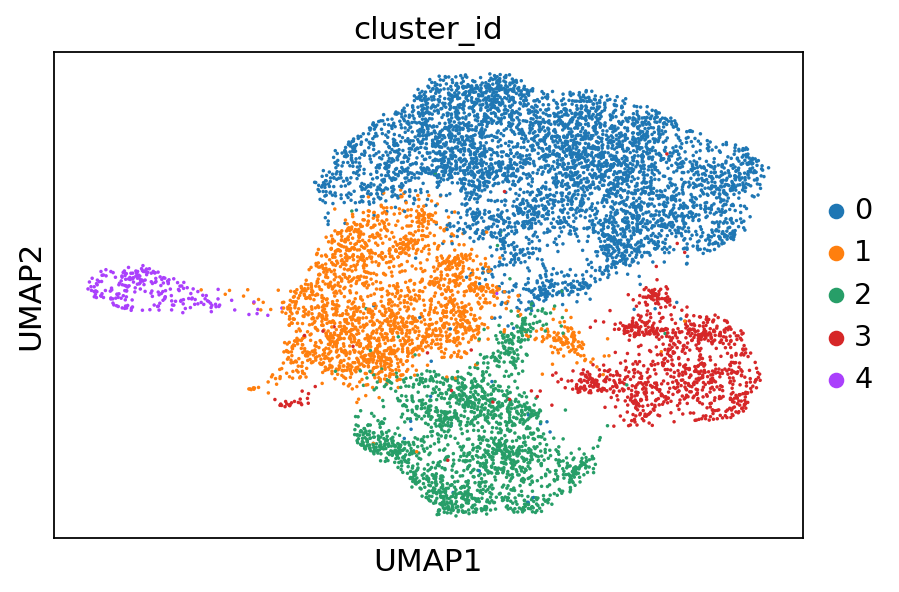

In [11]:
plotting_fcn(adata, color='cluster_id', size=10, save = "Ext_Fig_5a.pdf")

In [12]:
adata.obs['cluster_id'].cat.categories

Index(['0', '1', '2', '3', '4'], dtype='object')

In [13]:
adata.uns['cluster_id_colors']

['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc']

In [14]:
adata.uns['cluster_id_colors'][0] = '#9467bd'
adata.uns['cluster_id_colors'][1] = '#9467bd'
adata.uns['cluster_id_colors'][2] = '#ff7f0e'
adata.uns['cluster_id_colors'][3] = '#9467bd'
adata.uns['cluster_id_colors'][4] = '#9467bd'

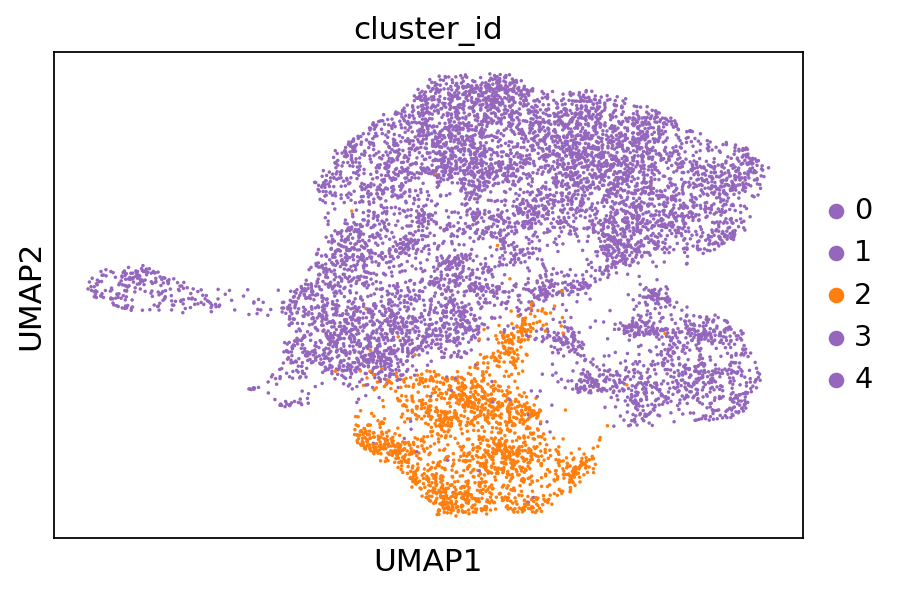

In [15]:
plotting_fcn(adata, color='cluster_id',size=10)

In [16]:
adata.var['gene_symbol'] = [x.split('_')[1] for x in adata.var.index]

mapping_df = adata.var.copy().reset_index().set_index('gene_symbol')

mapping_df.head()

,index
gene_symbol,
TSPAN6,ENSG00000000003_TSPAN6
DPM1,ENSG00000000419_DPM1
SCYL3,ENSG00000000457_SCYL3
C1orf112,ENSG00000000460_C1orf112
FUCA2,ENSG00000001036_FUCA2


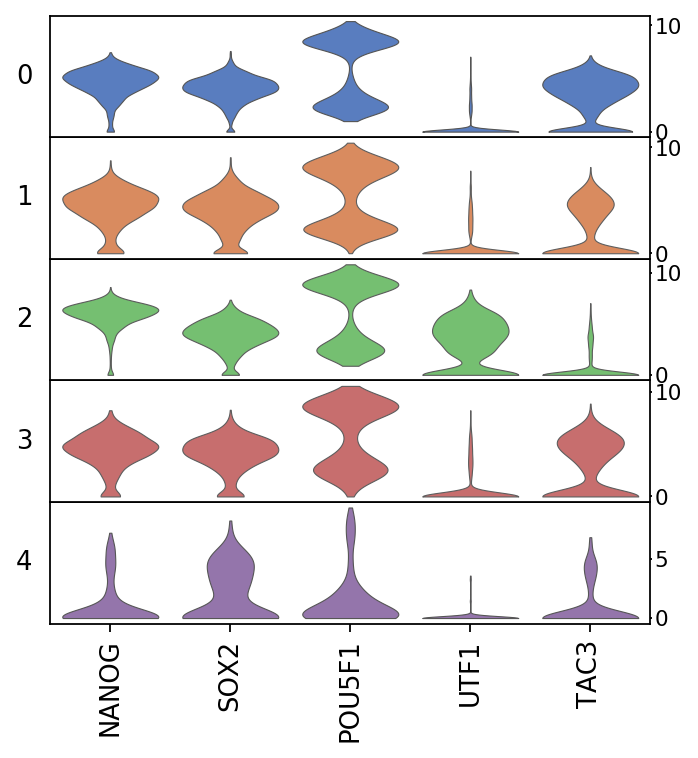

In [19]:
gene_list = ['NANOG','SOX2','POU5F1','UTF1','SP8','TAC3']
gene_list = ['NANOG','SOX2','POU5F1','UTF1','TAC3']

sc.pl.stacked_violin(adata, gene_list, gene_symbols='gene_symbol', groupby='cluster_id',
                     figsize=(5,5), save = "Ext_Fig_5c.pdf")